<h3>무작정따라하기-9-2</h3>

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np

plt.rcParams['font.family'] = "HCR Dotum"

In [6]:
df = pd.read_excel("고속터미널-25-10.xlsx")
df['date'] = df['date'].astype(str)
df['day'] = df['date'].str[6:8]
df['day'] = df['day'].astype(int)

grp = df.groupby("line")
ex3 = grp.get_group("3호선")
ex7 = grp.get_group("7호선")
ex9 = grp.get_group("9호선")

ex7.tail()
# # ---------------------------------------------------------
# df.groupby("line") 이란?
# - 실제 계산이 일어나는 게 아니라 "line 컬럼 기준으로 그룹을 어떻게 나눌지"를 정의한 GroupBy 객체를 생성한 것

# ✔ 즉 grp 자체에는 그룹 구조(키, 각 그룹의 index)만 저장되어 있음.
#
# ---------------------------------------------------------
# GroupBy 객체(grp)에 실제 데이터가 생기는 시점
# - mean(), sum(), count(), agg() 등 집계 함수를 호출할 때
# - 또는 특정 그룹을 추출(get_group())할 때

# - 따라서 grp는 '준비된 그룹 객체'일 뿐이며,
#   연산을 호출해야 비로소 실제 DataFrame이 생성됨.


,date,line,stn,geton,getoff,day
79,20251027,7호선,고속터미널,18190,16165,27
82,20251028,7호선,고속터미널,18008,16494,28
85,20251029,7호선,고속터미널,18364,16403,29
88,20251030,7호선,고속터미널,18499,16164,30
91,20251031,7호선,고속터미널,22087,17232,31


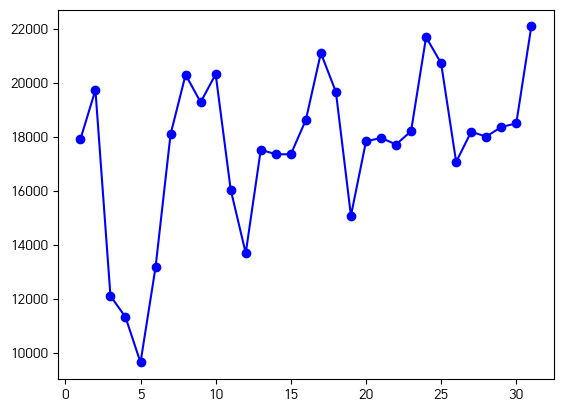

In [9]:
fig, ax = plt.subplots()

ax.plot(ex7['day'], ex7['geton'], "bo-")
plt.show()

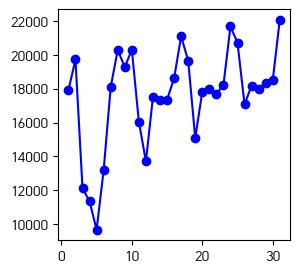

In [11]:
fig, ax = plt.subplots(figsize=(3,3))

ax.plot(ex7['day'], ex7['geton'], "bo-")
plt.show()

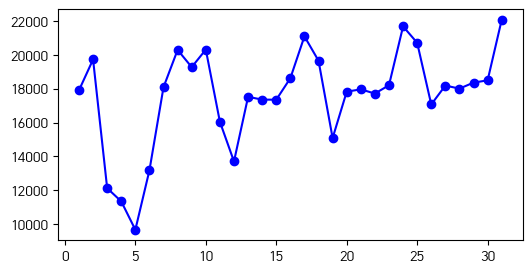

In [13]:
fig, ax = plt.subplots(figsize=(6,3))

ax.plot(ex7['day'], ex7['geton'], "bo-")
plt.show()

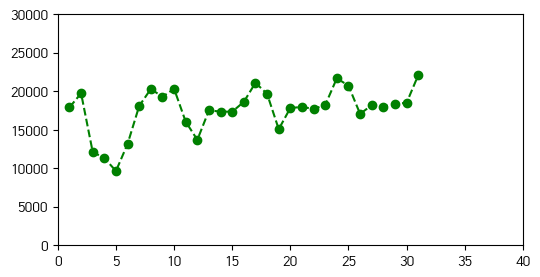

In [18]:
fig, ax = plt.subplots(figsize=(6,3))

ax.plot(ex7['day'], ex7['geton'], "go--")
ax.set_xlim(0,40)
ax.set_ylim(0,30000)

plt.show()

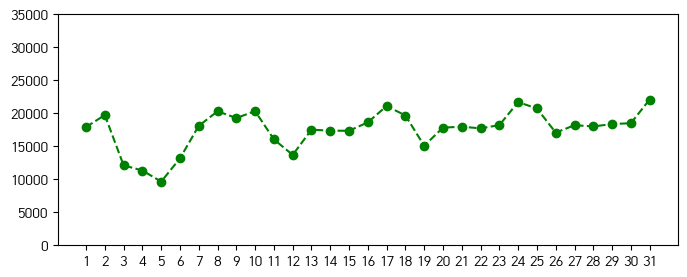

In [25]:
# 눈금 지정! 
# xticks
# yticks

fig, ax = plt.subplots(figsize=(8,3))

ax.plot(ex7['day'], ex7['geton'], "go--")
ax.set_ylim(0,30000)
ax.set_xticks(np.arange(1,32))
ax.set_yticks(np.arange(0,40000,5000))

plt.show()


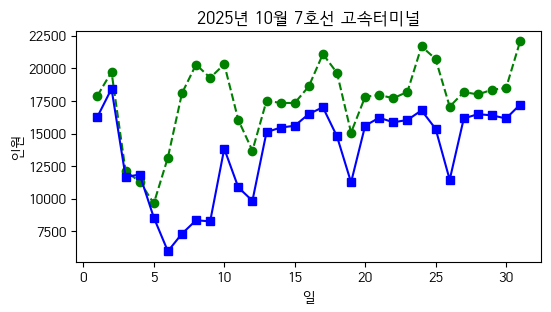

In [27]:
fig, ax = plt.subplots(figsize=(6,3))

ax.plot(ex7['day'], ex7['geton'], "go--")
ax.plot(ex7['day'], ex7['getoff'], "bs-")
ax.set_title("2025년 10월 7호선 고속터미널")
ax.set_xlabel("일")
ax.set_ylabel("인원")

plt.show()

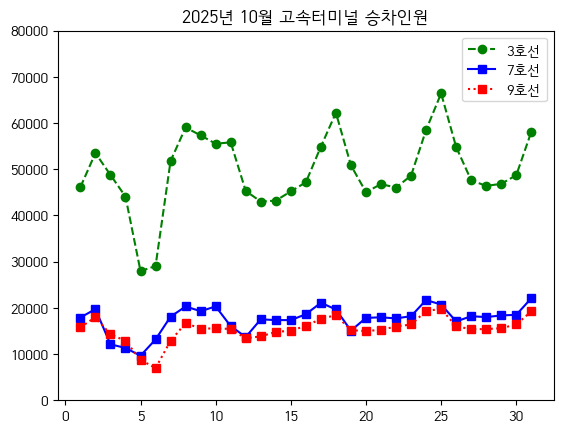

In [30]:
fig, ax = plt.subplots()

ax.set_title("2025년 10월 고속터미널 승차인원")
ax.plot(ex3['day'], ex3['geton'], "go--")
ax.plot(ex7['day'], ex7['geton'], "bs-")
ax.plot(ex9['day'], ex9['geton'], "rs:")
ax.legend(["3호선", "7호선", "9호선"])
ax.set_ylim(0,80000)
plt.show()

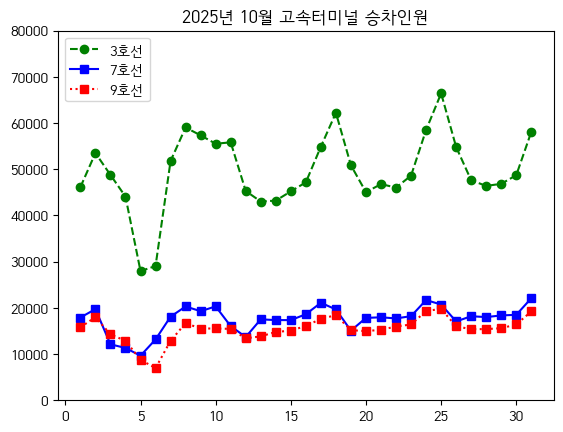

In [34]:
fig, ax = plt.subplots()
# label  옵션으로 범례 설정 후 legend 옵션으로 위치 설정

ax.set_title("2025년 10월 고속터미널 승차인원")

ax.plot(ex3['day'], ex3['geton'], "go--", label="3호선")
ax.plot(ex7['day'], ex7['geton'], "bs-", label="7호선")
ax.plot(ex9['day'], ex9['geton'], "rs:", label="9호선")
ax.legend(loc = "upper left")
ax.set_ylim(0,80000)
plt.show()

In [42]:
data = np.random.normal(100, 10, 1000)
[data.min(), data.max()]

[np.float64(68.30874294643633), np.float64(131.78011244855315)]

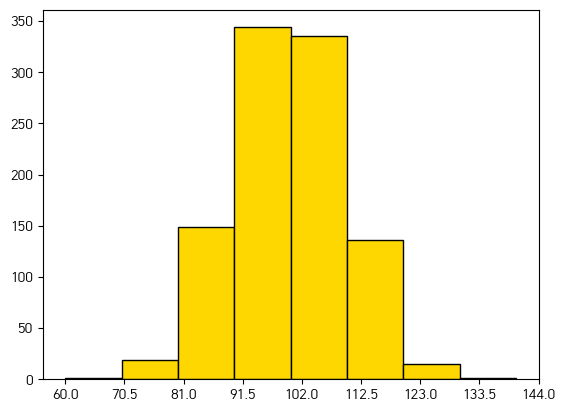

In [ ]:
fig, ax = plt.subplots()

ax.hist(data, bins=np.arange(60,150,10), color='gold', edgecolor='black')
ax.set_xticks(np.arange(60,150,10.5))

# ================ bins vs xticks ======================

# hist에서 x축 눈금(set_xticks)을 직접 지정하는 이유

# bins는 '막대 구간'을 결정  즉 히스토그램 막대 하나의 가로 폭
# x축 tick은 matplotlib의 '자동 tick locator'가 따로 결정한다.
# 즉, bins와 tick은 원래 완전히 다른 시스템이다.

#   bins를 np.arange(60,150,10)처럼 일정 간격으로 주면,
#   matplotlib이 자동으로 비슷한 간격의 tick을 선택하는 경우가 있어
#   set_xticks() 없이도 tick이 예쁘게 보이는 것처럼 보일 수 있음.
#
#   하지만 이는 항상 보장되지 않는다. (반례 존재)
#    ex)
#       bins = np.arange(0, 1000, 100)   # 0,100,200,...900
#       ax.hist(data, bins=bins)
#       근데 matplotlib은 축 범위(0~1000)를 보고 tick을 0, 200, 400, 600, 800, 1000
#       이런 식으로 “더 넓은 간격”으로 잡아버릴 수 있음. 100간격이아니라

#       왜?
#       tick locator가 “너무 많은 tick이 보이면 복잡하다”고 판단해서 스스로 간격을 바꿈.
#       ✔ 그래서 정확한 x축 눈금을 쓰고 싶다면 반드시 set_xticks()로 지정해야 한다.
# ---------------------------------------------------

plt.show()

In [ ]:
counts, bins, patches = ax.hist(data, bins=np.arange(60,150,10))
counts

# matplotlib의 hist()는 3가지 값을 한 번에 반환

# 1) counts
#    - 각 bin(막대 구간)에 포함된 데이터 개수
#    - 히스토그램 막대의 높이를 의미! 

# 2) bins
#    - bin의 경계값 리스트
#    - ex) [60, 70, 80, ...] → 구간 60~70, 70~80, ...
#    - 히스토그램 막대의 '가로 구간' 정보

# 3) patches
#    - 실제로 그려진 막대(Rectangle 객체)의 리스트
#    - 그래프에서 보이는 막대들을 하나씩 담고 있음.
#    - 특정 막대 색 바꾸기, 라벨 붙이기 등 고급 작업 가능.
#
# 요약
#   hist() = (막대 높이, 막대 경계, 막대 객체)
#   보통 counts, bins, patches로 나눠 받는다.

array([  1.,  19., 149., 344., 335., 136.,  15.,   1.])

In [55]:
x = np.arange(65, 145, 10)
y = counts

print(x)
print(y)

[ 65  75  85  95 105 115 125 135]
[  1.  19. 149. 344. 335. 136.  15.   1.]


In [56]:
# 도수분포다각형 그리기

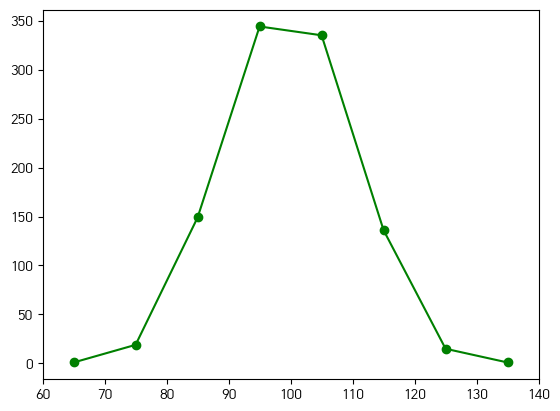

In [69]:
fig, ax = plt.subplots()

ax.plot(x, y, "go-")
ax.set_xticks(np.arange(60,150,10))
# ax.set_xticklabels([f"{b}★★" for b in np.arange(60,150,10)])
plt.show()

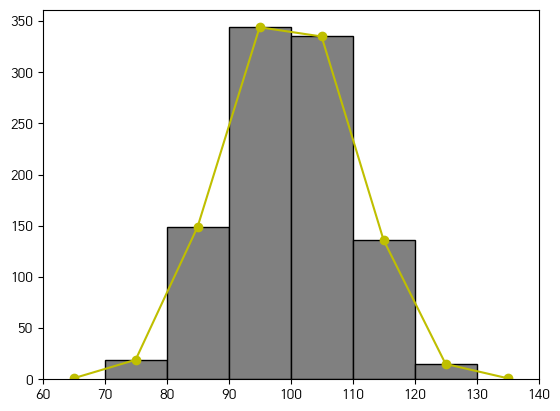

In [73]:
# 히스토그램과 같이 그리기

fig, ax = plt.subplots()

ax.hist(data, bins=np.arange(70,140,10), color="gray", edgecolor="black")
ax.plot(x, y, "yo-")
ax.set_xticks(np.arange(60,150,10))
plt.show()

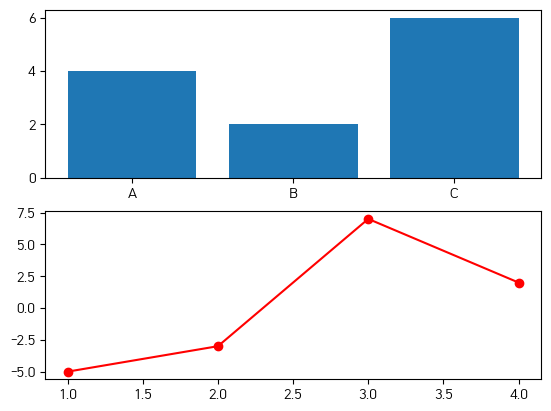

In [74]:
# 2 * 1 그래프 layout

plt.rcParams['axes.unicode_minus'] = False
# 우리가 설정한 'font.family' Dotum HCR은 유니코드 (-)를 인식하지 못하기 때문에,
# 유니코드 '-'  표시 X (False) 옵션을 줘서 -를 표시할 수 있게 설정

fig, ax = plt.subplots(2) # 2개의 그래프를 만들 공간 fig 설정!
ax[0].bar(["A", "B", "C"], [4,2,6])
ax[1].plot([1,2,3,4], [-5, -3, 7, 2], "ro-")

plt.show()


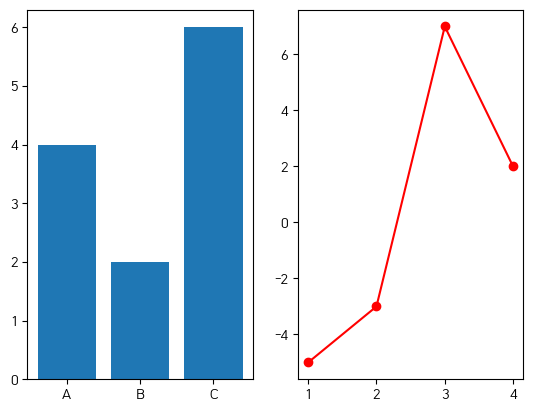

In [76]:
# 1*2 그래프 설정


plt.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots(ncols=2)

ax[0].bar(["A", "B", "C"], [4,2,6])
ax[1].plot([1,2,3,4], [-5, -3, 7, 2], "ro-")

plt.show()


# =================================================
# plt.subplots() 인자 해석 규칙
#
# 1) 숫자 하나만 넣을 때:
#    plt.subplots(2)
#    → nrows=2 로 해석됨 (기본은 '행 기준')
#    → 즉, 세로(위아래)로 2개의 subplot 생성.
#
#    # plt.subplots(2) == plt.subplots(nrows=2)
#
# 2) 가로(수평)로 배치하고 싶다면?
#    plt.subplots(ncols=2)
#    → '열(column) 기준'으로 2개를 좌우로 배치.
#
#    # columns(열) = 가로 방향
#    # rows(행)     = 세로 방향
#
# 3) 두 개의 인자를 주면 (행, 열) 구조가 됨:
#    plt.subplots(2, 2)  == plt.subplots(nrows=2, ncols=2)
#    → 2행 2열의 격자 형태(총 4개 subplot)
#
#    plt.subplots(1, 3)
#    → 1행 3열 (가로로 3개 나열)
#
# ---------------------------------------------------------
# ✔ 요약
#   - subplots(숫자) → 행(row) 수로 해석 → 세로 배치
#   - 가로 배치는 반드시 ncols 로 명시해야 함

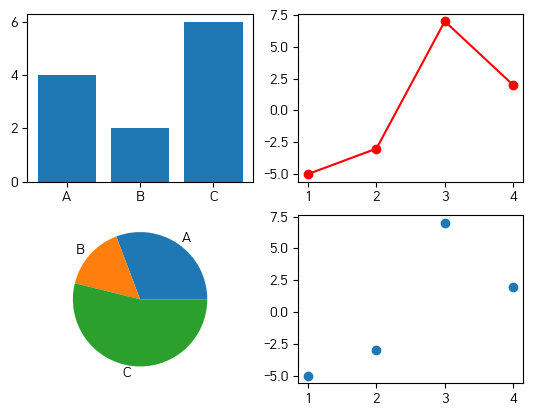

In [ ]:
# 2*2 

fig, ax = plt.subplots(2,2)

ax[0,0].bar(["A", "B", "C"], [4,2,6])
ax[0,1].plot([1,2,3,4], [-5, -3, 7, 2], "ro-")
ax[1,0].pie([4,2,7], labels=["A","B","C"])
ax[1,1].scatter([1,2,3,4], [-5, -3, 7, 2], marker="o")


plt.show()

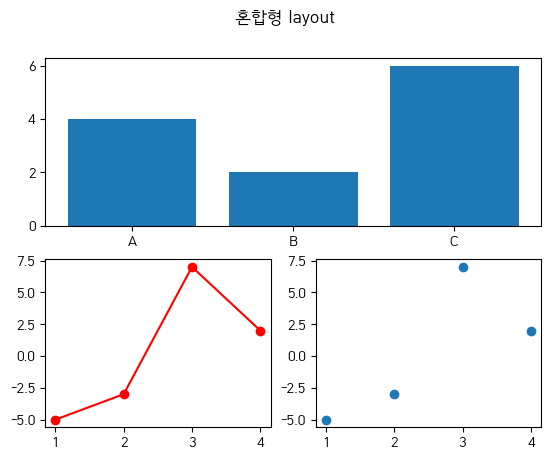

In [ ]:
# 1*2 그래프 설정
fig = plt.figure()
spec = fig.add_gridspec(2,2)

ax0 = fig.add_subplot(spec[0, :])
ax10 = fig.add_subplot(spec[1,0])
ax11 = fig.add_subplot(spec[1,1])

ax0.bar(["A", "B", "C"], [4,2,6])
ax10.plot([1,2,3,4], [-5, -3, 7, 2], "ro-")
ax11.scatter([1,2,3,4], [-5, -3, 7, 2], marker="o")
fig.suptitle("혼합형 layout")

plt.show()

In [ ]:
# spec = fig.add_gridspec(2,2)

# 도화지(fig)를 2행 × 2열 격자로 나눠서 각 칸을 subplot이 자리 잡을 수 있는 ‘좌표’로 만드는 작업.
# 즉, 도화지를 네 칸으로 나눠둔 상태

# 기존 fig, ax = plt.subplots()는 "자동 배치"
# 전체 레이아웃을 딱 “행 × 열” 크기로 정함
# 모든 subplot 크기가 동일

# 특정 subplot을 가로로 길게 만들거나,
# 2칸을 합치거나 하는 게 불가능
# 인덱스 주면 자동배치가 아니라, 내가 직접 배치 
# 그래서 plt.subplots() 가 아니라, fig 객체 안에 있는 add_subplot()를 써서 그래프 정보 ax객체를 fig에 배치

# ┌────────────┬────────────┐
# │ spec[0,0]  │ spec[0,1   │
# ├────────────┤────────────│
# │ spec[1,0]  │ spec[1,1]  │
# └─────────────────────────┘

# 어떻게 쓸까?
# 1) ax0 = fig.add_subplot(spec[0, :])
# spec[0, :] → 0번째 행 전체 (왼쪽 + 오른쪽)
# 즉, 첫 번째 줄 전체를 하나의 subplot이 차지

# 그래서 ax0가 이렇게 됨:
# ┌───────────────┐
# │     ax0       │   ← 윗줄 전체
# ├───────┬───────┤
# │       │       │

# 2) ax10 = fig.add_subplot(spec[1, 0])
# 두 번째 줄 왼쪽 칸
# 3) ax11 = fig.add_subplot(spec[1, 1])
# 두 번째 줄 오른쪽 칸

# 그래서 전체 레이아웃이 이렇게 됨.

# ┌──────────────────────┐
# │          ax0         │   (가로로 길게 1개)
# ├───────────┬──────────┤
# │   ax10    │   ax11   │  (아래쪽 2개)
# └───────────┴──────────┘


#  -> subplots()로는 절대 못 만드는 구조

# GridSpec = figure 안에서 subplot을 배치할 좌표계를 만드는 설계도.

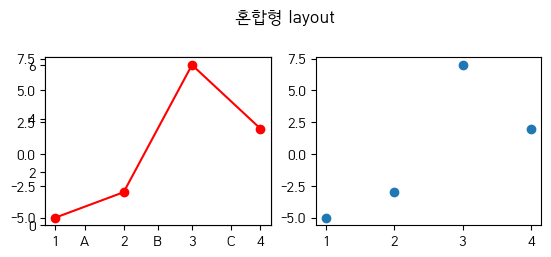

In [84]:
# 1*2 그래프 설정
fig = plt.figure()
spec = fig.add_gridspec(2,2)

ax0 = fig.add_subplot(spec[0, :1])
ax10 = fig.add_subplot(spec[0,0])
ax11 = fig.add_subplot(spec[0,1])

ax0.bar(["A", "B", "C"], [4,2,6])
ax10.plot([1,2,3,4], [-5, -3, 7, 2], "ro-")
ax11.scatter([1,2,3,4], [-5, -3, 7, 2], marker="o")
fig.suptitle("혼합형 layout")

plt.show()